In [ ]:
# import numpy as np
# from utils import plot_cluster_centers, load_images_labels

# def compute_dist(X, centers):
#     """
#     Compute the Euclidean distance between each point in X and each center in 'centers'.
#     X: N x D
#     centers: K x D
#     Output: N x K matrix of distances
#     """
#     N, D = X.shape
#     K = centers.shape[0]
#     dist = np.sqrt(np.sum((X[:, np.newaxis, :] - centers[np.newaxis, :, :])**2, axis=2))
#     return dist

# def mykmeans(digits, K):
#     """
#     Perform K-means clustering on 'digits' using K clusters.
    
#     digits: (N, D) - N data points, each of dimension D = 784
#     K: number of clusters
#     max_iter: maximum number of iterations
    
#     Returns:
#       - cluster_assignments: (N,) array of cluster indices [0..K-1]
#       - centers: (K, D) array of cluster centers
#     """
#     # Set random seed for reproducibility
#     np.random.seed(10)
    
#     # Pick K random data points as initial centers
#     centers = digits[np.random.choice(digits.shape[0], K, replace=False)]
#     max_iter = 1000
#     threshold = 1e-5 # to check convergence

#     for i in range(max_iter):
#         # Cluster assignment based on closest center
#         distances = compute_dist(digits, centers)
#         cluster_assignments = np.argmin(distances, axis=1)

#         # Update centers
#         new_centers = np.array([digits[cluster_assignments == k].mean(axis=0) for k in range(K)])

#         # Check for convergence
#         if np.linalg.norm(new_centers - centers) <= threshold:
#             print(f"K-Means converged in {i} iterations.")
#             centers = new_centers
#             break
#         centers = new_centers

#     return cluster_assignments, centers

# def mykmedoids(digits, K):
#     """
#     Perform K-medoids clustering on 'digits' using K clusters.
    
#     digits: (N, D) - N data points, each of dimension D = 784
#     K: number of clusters
#     max_iter: maximum number of iterations
    
#     Returns:
#       - cluster_assignments: (N,) array of cluster indices [0..K-1]
#       - centers: (K, D) array of medoids (a subset of the original points)
#     """
#     # Set random seed for reproducibility
#     np.random.seed(10)
    
#     # Pick K random data points as initial centers
#     centers = digits[np.random.choice(digits.shape[0], K, replace=False)]
#     max_iter = 1000
#     threshold = 1e-5 # to check convergence
#     cost = np.inf # the objective function

#     # Distance function
#     def kmedoids_dist(X, centers, dist_type='euclidean'):
#         N, D = X.shape
#         K = centers.shape[0]
        
#         # Euclidean distance
#         if dist_type == 'euclidean':
#             dist = np.sqrt(np.sum((X[:, np.newaxis, :] - centers[np.newaxis, :, :])**2, axis=2))
        
#         # Manhattan distance
#         elif dist_type == 'manhattan':
#             dist = np.sum(np.abs(X[:, np.newaxis, :] - centers[np.newaxis, :, :]), axis=2)
#         return dist
    
#     for i in range(max_iter):
#         # Cluster assignment based on closest center
#         distances = kmedoids_dist(digits, centers) # default is euclidean
#         cluster_assignments = np.argmin(distances, axis=1)
#         cost = np.sum(np.min(distances, axis=1))

#         # Update centers
#         # Pick representative for each cluster randomly
#         new_centers = np.array([digits[np.random.choice(np.where(cluster_assignments == k)[0], 1)[0]] for k in range(K)])
#         new_distances = kmedoids_dist(digits, new_centers)
#         new_cost = np.sum(np.min(new_distances, axis=1))

#         # Check for convergence
#         if cost - new_cost <= threshold:
#             print(f"K-Medoids converged in {i} iterations.")
#             centers = new_centers
#             break
#         centers = new_centers

#     return cluster_assignments, centers

# def evaluate_clustering(cluster_assignments, labels, K):
#     """
#     Evaluate the clustering result by assigning each cluster to the most frequent 
#     true label in that cluster, then compute the overall accuracy.
    
#     cluster_assignments: (N,) array of cluster indices
#     labels: (N,) array of true digit labels
#     K: number of clusters
#     Returns:
#       accuracy (float)
#     """
#     correct = 0
#     N = len(labels)
    
#     for k in range(K):
#         cluster_points_idx = np.where(cluster_assignments == k)[0]
#         if len(cluster_points_idx) == 0:
#             continue
#         cluster_labels = labels[cluster_points_idx]
#         most_common_label = np.bincount(cluster_labels).argmax()
#         correct += np.sum(cluster_labels == most_common_label)
    
#     accuracy = correct / N
#     return accuracy


# def main():
#     # Load the data
#     directory = "data"
#     images, labels = load_images_labels(directory)
    
#     # In case you get an out of memory error you may decrease N
#     N = 1000
#     images_subset = images[:N].astype(np.float32)
#     labels_subset = labels[:N]
    
#     K = 5  # Number of clusters

#     # Apply K-Medoids on the clean data
#     print("Running K-Medoids on clean data...")
#     kmedoids_assignments, kmedoids_centers = mykmedoids(images_subset, K)

#     # Apply K-Means on the clean data
#     print("Running K-Means on clean data...")
#     kmeans_assignments, kmeans_centers = mykmeans(images_subset, K)
#     print(kmeans_centers.shape)

#     # Plot cluster centers
#     plot_cluster_centers(kmeans_centers, "K-Means Cluster Centers (Clean Data)", K)
#     plot_cluster_centers(kmedoids_centers, "K-Medoids Cluster Centers (Clean Data)", K)

#     # Evaluate clustering accuracy
#     kmedoids_accuracy = evaluate_clustering(kmedoids_assignments, labels_subset, K)
#     print(f"K-Medoids accuracy (clean data): {kmedoids_accuracy:.4f}")
#     kmeans_accuracy = evaluate_clustering(kmeans_assignments, labels_subset, K)
#     print(f"K-Means accuracy (clean data): {kmeans_accuracy:.4f}")

#     # Add noisy contaminanted datapoints/outliers to the dataset
#     print("Adding contaminanted datapoints to the data...")
#     num_outliers = 100
#     image_size = images_subset.shape[1]
#     outliers = np.random.randint(0, 256, size=(num_outliers, image_size)).astype(np.float32)
#     images_contaminated = np.vstack([images_subset, outliers])
#     labels_contaminated = np.hstack([labels_subset, -1 * np.ones(num_outliers, dtype=int)])
#     print("Running K-Medoids on contaminated data...")
#     kmedoids_assignments_cont, kmedoids_centers_cont = mykmedoids(images_contaminated, K)
#     print("Running K-Means on contaminated data...")
#     kmeans_assignments_cont, kmeans_centers_cont = mykmeans(images_contaminated, K)
    
#     # Evaluate clustering accuracy after contamination
#     mask_no_outliers = labels_contaminated != -1
#     kmedoids_accuracy_cont = evaluate_clustering(kmedoids_assignments_cont[mask_no_outliers], labels_contaminated[mask_no_outliers], K)
#     print(f"K-Medoids accuracy (contaminated data): {kmedoids_accuracy_cont:.4f}")
#     kmeans_accuracy_cont = evaluate_clustering(kmeans_assignments_cont[mask_no_outliers], labels_contaminated[mask_no_outliers], K)
#     print(f"K-Means accuracy (contaminated data): {kmeans_accuracy_cont:.4f}")

# if __name__ == "__main__":
#     main()

In [121]:
import numpy as np
from utils import plot_cluster_centers, load_images_labels

def compute_dist(X, centers):
    """
    Compute the Euclidean distance between each point in X and each center in 'centers'.
    X: N x D
    centers: K x D
    Output: N x K matrix of distances
    """
    N, D = X.shape
    K = centers.shape[0]
    dist = np.sqrt(np.sum((X[:, np.newaxis, :] - centers[np.newaxis, :, :])**2, axis=2))
    return dist

def mykmeans(digits, K):
    """
    Perform K-means clustering on 'digits' using K clusters.
    
    digits: (N, D) - N data points, each of dimension D = 784
    K: number of clusters
    max_iter: maximum number of iterations
    
    Returns:
      - cluster_assignments: (N,) array of cluster indices [0..K-1]
      - centers: (K, D) array of cluster centers
    """
    # Set random seed for reproducibility
    np.random.seed(10)
    
    # Pick K random data points as initial centers
    centers = digits[np.random.choice(digits.shape[0], K, replace=False)]
    max_iter = 1000
    threshold = 1e-5 # to check convergence

    for i in range(max_iter):
        # Cluster assignment based on closest center
        distances = compute_dist(digits, centers)
        cluster_assignments = np.argmin(distances, axis=1)

        # Update centers
        new_centers = np.array([digits[cluster_assignments == k].mean(axis=0) for k in range(K)])

        # Check for convergence
        if np.linalg.norm(new_centers - centers) <= threshold:
            print(f"K-Means converged in {i} iterations.")
            centers = new_centers
            break
        centers = new_centers

    return cluster_assignments, centers

def mykmedoids(digits, K):
    """
    Perform K-medoids clustering on 'digits' using K clusters.
    
    digits: (N, D) - N data points, each of dimension D = 784
    K: number of clusters
    max_iter: maximum number of iterations
    
    Returns:
      - cluster_assignments: (N,) array of cluster indices [0..K-1]
      - centers: (K, D) array of medoids (a subset of the original points)
    """
    # Set random seed for reproducibility
    np.random.seed(2)
    
    # Pick K random data points as initial centers
    centers = digits[np.random.choice(digits.shape[0], K, replace=False)]
    max_iter = 1000
    threshold = 1e-5 # to check convergence
    cost = np.inf # the objective function

    # Distance function
    def kmedoids_dist(X, centers, dist_type='euclidean'):
        N, D = X.shape
        K = centers.shape[0]
        
        # Euclidean distance
        if dist_type == 'euclidean':
            dist = np.sqrt(np.sum((X[:, np.newaxis, :] - centers[np.newaxis, :, :])**2, axis=2))
        
        # Manhattan distance
        elif dist_type == 'manhattan':
            dist = np.sum(np.abs(X[:, np.newaxis, :] - centers[np.newaxis, :, :]), axis=2)
        
        # Cosine distances
        elif dist_type == 'cosine':
            X_norm = np.linalg.norm(X, axis=1, keepdims=True) # magnitude of each row vector in X
            centers_norm = np.linalg.norm(centers, axis=1, keepdims=True) # magnitude of each row vector in centers
            dist = 1 - (X @ centers.T) / (X_norm * centers_norm.T + 1e-10) # subtract from 1 to convert cosine similarity to distance
        return dist
    
    for i in range(max_iter):
        # Cluster assignment based on closest center
        distances = kmedoids_dist(digits, centers, dist_type='cosine') # default is euclidean
        cluster_assignments = np.argmin(distances, axis=1)
        cost = np.sum(np.min(distances, axis=1))

        # Update centers
        # # Pick representative for each cluster randomly
        # new_centers = np.array([digits[np.random.choice(np.where(cluster_assignments == k)[0], 1)[0]] for k in range(K)])

        # Choose new medoid as the point in the cluster minimizing total distance to other points in the cluster
        new_centers = []
        for k in range(K):
            clus_points = digits[np.where(cluster_assignments == k)[0]]

            # If empty cluster, keep old center
            if len(clus_points) == 0:
                new_centers.append(centers[k])
                continue
            
            # Calculate pairwise distances within the cluster
            cluster_distances = kmedoids_dist(clus_points, clus_points, dist_type='cosine')

            # New cluster center is the point with minimum total distance to other points
            total_distances = np.sum(cluster_distances, axis=1)
            medoid_idx = np.argmin(total_distances)
            new_centers.append(clus_points[medoid_idx])
        new_distances = kmedoids_dist(digits, np.array(new_centers), dist_type='manhattan')
        new_cost = np.sum(np.min(new_distances, axis=1))

        # Check for convergence
        if cost > new_cost and cost - new_cost <= threshold:
            print(f"K-Medoids converged in {i} iterations.")
            centers = np.array(new_centers)
            break
        centers = np.array(new_centers)

    return cluster_assignments, centers

def evaluate_clustering(cluster_assignments, labels, K):
    """
    Evaluate the clustering result by assigning each cluster to the most frequent 
    true label in that cluster, then compute the overall accuracy.
    
    cluster_assignments: (N,) array of cluster indices
    labels: (N,) array of true digit labels
    K: number of clusters
    Returns:
      accuracy (float)
    """
    correct = 0
    N = len(labels)
    
    for k in range(K):
        cluster_points_idx = np.where(cluster_assignments == k)[0]
        if len(cluster_points_idx) == 0:
            continue
        cluster_labels = labels[cluster_points_idx]
        most_common_label = np.bincount(cluster_labels).argmax()
        correct += np.sum(cluster_labels == most_common_label)
    
    accuracy = correct / N
    return accuracy


def main():
    # Load the data
    directory = "data"
    images, labels = load_images_labels(directory)
    
    # In case you get an out of memory error you may decrease N
    N = 1000
    images_subset = images[:N].astype(np.float32)
    labels_subset = labels[:N]
    
    K = 5  # Number of clusters

    # Apply K-Medoids on the clean data
    print("Running K-Medoids on clean data...")
    kmedoids_assignments, kmedoids_centers = mykmedoids(images_subset, K)

    # Apply K-Means on the clean data
    print("Running K-Means on clean data...")
    kmeans_assignments, kmeans_centers = mykmeans(images_subset, K)
    print(kmeans_centers.shape)

    # Plot cluster centers
    plot_cluster_centers(kmeans_centers, "K-Means Cluster Centers (Clean Data)", K)
    plot_cluster_centers(kmedoids_centers, "K-Medoids Cluster Centers (Clean Data)", K)

    # Evaluate clustering accuracy
    kmedoids_accuracy = evaluate_clustering(kmedoids_assignments, labels_subset, K)
    print(f"K-Medoids accuracy (clean data): {kmedoids_accuracy:.4f}")
    kmeans_accuracy = evaluate_clustering(kmeans_assignments, labels_subset, K)
    print(f"K-Means accuracy (clean data): {kmeans_accuracy:.4f}")

    # Add noisy contaminanted datapoints/outliers to the dataset
    print("Adding contaminanted datapoints to the data...")
    num_outliers = 100
    image_size = images_subset.shape[1]
    outliers = np.random.randint(0, 256, size=(num_outliers, image_size)).astype(np.float32)
    images_contaminated = np.vstack([images_subset, outliers])
    labels_contaminated = np.hstack([labels_subset, -1 * np.ones(num_outliers, dtype=int)])
    print("Running K-Medoids on contaminated data...")
    kmedoids_assignments_cont, kmedoids_centers_cont = mykmedoids(images_contaminated, K)
    print("Running K-Means on contaminated data...")
    kmeans_assignments_cont, kmeans_centers_cont = mykmeans(images_contaminated, K)
    
    # Evaluate clustering accuracy after contamination
    mask_no_outliers = labels_contaminated != -1
    kmedoids_accuracy_cont = evaluate_clustering(kmedoids_assignments_cont[mask_no_outliers], labels_contaminated[mask_no_outliers], K)
    print(f"K-Medoids accuracy (contaminated data): {kmedoids_accuracy_cont:.4f}")
    kmeans_accuracy_cont = evaluate_clustering(kmeans_assignments_cont[mask_no_outliers], labels_contaminated[mask_no_outliers], K)
    print(f"K-Means accuracy (contaminated data): {kmeans_accuracy_cont:.4f}")

Running K-Medoids on clean data...
Running K-Means on clean data...
K-Means converged in 12 iterations.
(5, 784)


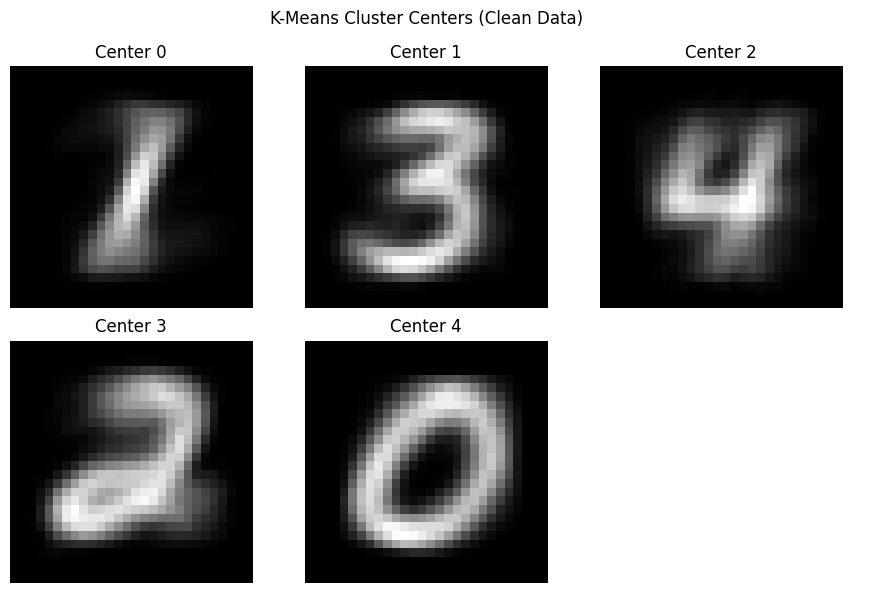

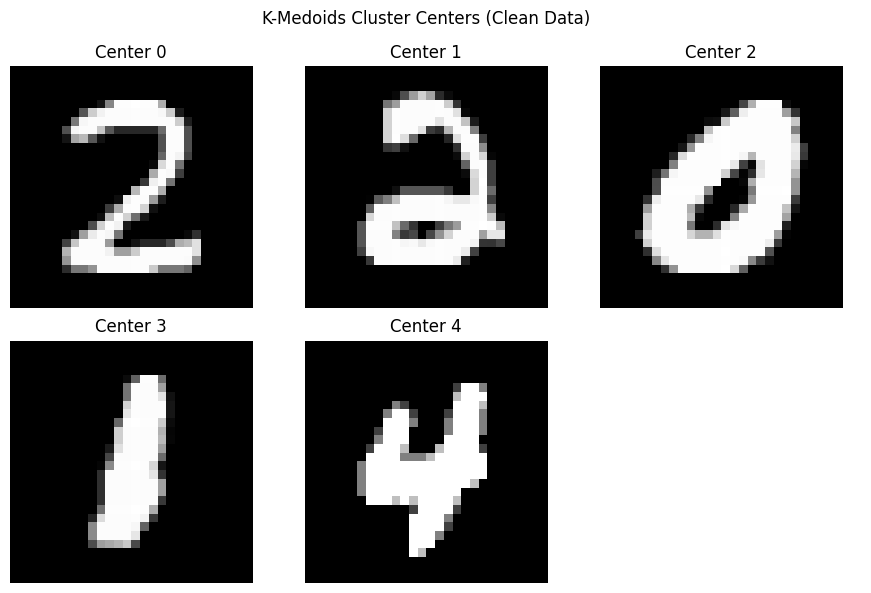

K-Medoids accuracy (clean data): 0.6570
K-Means accuracy (clean data): 0.8450
Adding contaminanted datapoints to the data...
Running K-Medoids on contaminated data...
Running K-Means on contaminated data...
K-Means converged in 22 iterations.
K-Medoids accuracy (contaminated data): 0.6900
K-Means accuracy (contaminated data): 0.7320


In [122]:
main()